### <center>**CitiBike Data Analysis**</center>

##### Authors:
* Sriram Sai Krishna
* Navya Prasad
* Jagrati Chauhan
* Srimedha Bhavani Chandoo
* Sai Pratheek KVDSNK
* Austin Krohn

 ##### **Introduction:**
Urban traffic has always been a hindrance for people who commute on a regular basis for their daily activities, including work, school, etc. After Covid, the use of personal vehicles increased in an unprecedented way. The economic crisis led to the rise in cost of public and private transport. There is a need for a cheaper and quicker transportation options which can be used for daily commute purposes. This is where the NYC Citi Bike stands in the industry; filling the gaps caused by the urban transport and associated traffic.

CitiBike is an e-bike service located around the NYC & New Jersey border, which provides a cheaper and environmental friendly transport option for daily commuters as well as tourists. The system consists of bicycles supported by batteries and a DC motor to improve mobility and reduce the effort by the rider.

##### **Goal:**
Based on the data collected by CitiBike during the year 2022, we want to strategically optimize the e-bike fleet deployment and station management to maximize ridership and revenue. The analysis will take into account the interplay between rider preferences and station utilization patterns across different member types, ensuring an equitable distribution of e-bikes throughout the service area.

##### **About the Data:**

CityBike trip history data is publicly available through the link, https://citibikenyc.com/system-data. We have selected 2022 year's data for the analysis. The dataset contains the following attributes,
* **ride_id:** It is unique identifier to distinguish trips.
* **rideable_type:** It indicates the type of bycycle used. There are 3 types of bikes electric_bike, classic_bike, docked_bike.
* **started_at:** It indicates the trip start datetime.
* **ended_at:** It indicates the trip end datetime.
* **start_station_name:** It indicates the name of the station from where the ride started.
* **start_station_id:** A unique identifier to indicate the start station.
* **end_station_name:** It indicates the name of the station where the ride ended.
* **end_station_id:** A unique identifier to indicate the end station.
* **member_casual:** It indicates whether the rider is a casual user or has a membership with Citi Bike.



##### **Environment Setup:** 
Let's start with importing the essential libraries for our analysis. The libraries imported below help us to read, preprocess, clean, manipulate and visualise the data.

In [2]:
# Importing all the essential libraries

import pandas as pd
import glob
import seaborn as sns
import matplotlib.pyplot as plt
import folium
import numpy as np
import plotly.express as px

The raw data that is obtained from the source are multiple `zip` files which are not readable by python directly. So they are extracted and stored in a single location as multiple `CSV` files. These files are read as follows,

In [3]:
path='*.csv'
bikes_data = pd.concat([pd.read_csv(file) for file in glob.glob(path)], ignore_index=True)
bikes_data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,89CDCE3224502904,classic_bike,2022-07-21 18:19:45,2022-07-21 18:28:21,Marshall St & 2 St,HB408,8 St & Washington St,HB603,40.740802,-74.042521,40.745984,-74.028199,member
1,3E6E50F51BD4CBD9,electric_bike,2022-07-21 17:50:57,2022-07-21 17:59:17,Marshall St & 2 St,HB408,11 St & Washington St,HB502,40.740802,-74.042521,40.749985,-74.027150,casual
2,8A9058FAA9115562,electric_bike,2022-07-23 11:51:55,2022-07-23 11:59:16,Marshall St & 2 St,HB408,Oakland Ave,JC022,40.740802,-74.042521,40.737604,-74.052478,member
3,C566A187663748AE,classic_bike,2022-07-30 20:34:40,2022-07-30 20:48:40,Marshall St & 2 St,HB408,Bloomfield St & 15 St,HB203,40.740802,-74.042521,40.754530,-74.026580,member
4,7E754D57276BE57E,classic_bike,2022-07-14 18:42:34,2022-07-14 18:49:45,Marshall St & 2 St,HB408,Clinton St & 7 St,HB303,40.740802,-74.042521,40.745420,-74.033320,casual


##### **Cleaning the data:**
Firstly, let's check what all columns that we have and the number of records available.

In [4]:
bikes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 895485 entries, 0 to 895484
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             895485 non-null  object 
 1   rideable_type       895485 non-null  object 
 2   started_at          895485 non-null  object 
 3   ended_at            895485 non-null  object 
 4   start_station_name  895475 non-null  object 
 5   start_station_id    895475 non-null  object 
 6   end_station_name    892281 non-null  object 
 7   end_station_id      892281 non-null  object 
 8   start_lat           895485 non-null  float64
 9   start_lng           895485 non-null  float64
 10  end_lat             893515 non-null  float64
 11  end_lng             893515 non-null  float64
 12  member_casual       895485 non-null  object 
dtypes: float64(4), object(9)
memory usage: 88.8+ MB


In [5]:
# formating datetime columns to timestamp format.
bikes_data['started_at']=pd.to_datetime(bikes_data['started_at']) 
bikes_data['ended_at']=pd.to_datetime(bikes_data['ended_at']) 

#Formatting Latitude and Longitude data
bikes_data['start_lng']=pd.to_numeric(bikes_data['start_lng'])
bikes_data['start_lat']=pd.to_numeric(bikes_data['start_lat']) 
bikes_data['end_lat']=pd.to_numeric(bikes_data['end_lat'])
bikes_data['end_lng']=pd.to_numeric(bikes_data['end_lng'])


We can observe that the datatypes are inconsistent. Let's bring them to a proper format

Let's recheck the data types

In [6]:
bikes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 895485 entries, 0 to 895484
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   ride_id             895485 non-null  object        
 1   rideable_type       895485 non-null  object        
 2   started_at          895485 non-null  datetime64[ns]
 3   ended_at            895485 non-null  datetime64[ns]
 4   start_station_name  895475 non-null  object        
 5   start_station_id    895475 non-null  object        
 6   end_station_name    892281 non-null  object        
 7   end_station_id      892281 non-null  object        
 8   start_lat           895485 non-null  float64       
 9   start_lng           895485 non-null  float64       
 10  end_lat             893515 non-null  float64       
 11  end_lng             893515 non-null  float64       
 12  member_casual       895485 non-null  object        
dtypes: datetime64[ns](2), float64

As the data is in proper format, now let us check how unique the data in each column is. This helps us to understand the catagorical data.

In [7]:
for column in bikes_data.columns:
    unique_values = bikes_data[column].nunique()
    print(column,":",unique_values)

ride_id : 895485
rideable_type : 3
started_at : 870490
ended_at : 869885
start_station_name : 84
start_station_id : 86
end_station_name : 320
end_station_id : 319
start_lat : 65811
start_lng : 68476
end_lat : 415
end_lng : 412
member_casual : 2


Apart from `rideable_type` and `member_casual` column, all the others have high cardinal values.


Now, let us check the null values present in each column.

In [8]:
# Check for all the null values that are present in all the columns

for column in bikes_data.columns:
    nulls = bikes_data[column].isna().sum()
    null_prcnt = (bikes_data[column].isna().sum()/bikes_data[column].count())*100
    print(column,": ",nulls,'|', null_prcnt,'%')

ride_id :  0 | 0.0 %
rideable_type :  0 | 0.0 %
started_at :  0 | 0.0 %
ended_at :  0 | 0.0 %
start_station_name :  10 | 0.0011167257600714704 %
start_station_id :  10 | 0.0011167257600714704 %
end_station_name :  3204 | 0.3590797069533028 %
end_station_id :  3204 | 0.3590797069533028 %
start_lat :  0 | 0.0 %
start_lng :  0 | 0.0 %
end_lat :  1970 | 0.2204775521395836 %
end_lng :  1970 | 0.2204775521395836 %
member_casual :  0 | 0.0 %


As we can observe, we have very less number of nulls in the data.
The columns `start_station_name`, `start_station_id`, `end_station_name`, `end_station_id`, `end_lat` and `end_lng` have few nulls which  can be dropped directly as they won't effect the data much.

In [9]:
bikes_data=bikes_data.dropna()

In [10]:
for column in bikes_data.columns:
    nulls = bikes_data[column].isna().sum()
    null_prcnt = (bikes_data[column].isna().sum()/bikes_data[column].count())*100
    print(column,": ",nulls,'|', null_prcnt,'%')

ride_id :  0 | 0.0 %
rideable_type :  0 | 0.0 %
started_at :  0 | 0.0 %
ended_at :  0 | 0.0 %
start_station_name :  0 | 0.0 %
start_station_id :  0 | 0.0 %
end_station_name :  0 | 0.0 %
end_station_id :  0 | 0.0 %
start_lat :  0 | 0.0 %
start_lng :  0 | 0.0 %
end_lat :  0 | 0.0 %
end_lng :  0 | 0.0 %
member_casual :  0 | 0.0 %


In [11]:
bikes_data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,89CDCE3224502904,classic_bike,2022-07-21 18:19:45,2022-07-21 18:28:21,Marshall St & 2 St,HB408,8 St & Washington St,HB603,40.740802,-74.042521,40.745984,-74.028199,member
1,3E6E50F51BD4CBD9,electric_bike,2022-07-21 17:50:57,2022-07-21 17:59:17,Marshall St & 2 St,HB408,11 St & Washington St,HB502,40.740802,-74.042521,40.749985,-74.027150,casual
2,8A9058FAA9115562,electric_bike,2022-07-23 11:51:55,2022-07-23 11:59:16,Marshall St & 2 St,HB408,Oakland Ave,JC022,40.740802,-74.042521,40.737604,-74.052478,member
3,C566A187663748AE,classic_bike,2022-07-30 20:34:40,2022-07-30 20:48:40,Marshall St & 2 St,HB408,Bloomfield St & 15 St,HB203,40.740802,-74.042521,40.754530,-74.026580,member
4,7E754D57276BE57E,classic_bike,2022-07-14 18:42:34,2022-07-14 18:49:45,Marshall St & 2 St,HB408,Clinton St & 7 St,HB303,40.740802,-74.042521,40.745420,-74.033320,casual


Let us create sperate `date` and `time` columns from the `started_at` and `ended_at` columns for improving the data usability.

In [12]:
# Seperating Date and Time values from datetime columns into new columns

bikes_data['start_date'] = bikes_data['started_at'].dt.date
bikes_data['start_time'] = bikes_data['started_at'].dt.time


bikes_data['end_date'] = bikes_data['ended_at'].dt.date
bikes_data['end_time'] = bikes_data['ended_at'].dt.time

In [13]:
bikes_data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,start_date,start_time,end_date,end_time
0,89CDCE3224502904,classic_bike,2022-07-21 18:19:45,2022-07-21 18:28:21,Marshall St & 2 St,HB408,8 St & Washington St,HB603,40.740802,-74.042521,40.745984,-74.028199,member,2022-07-21,18:19:45,2022-07-21,18:28:21
1,3E6E50F51BD4CBD9,electric_bike,2022-07-21 17:50:57,2022-07-21 17:59:17,Marshall St & 2 St,HB408,11 St & Washington St,HB502,40.740802,-74.042521,40.749985,-74.027150,casual,2022-07-21,17:50:57,2022-07-21,17:59:17
2,8A9058FAA9115562,electric_bike,2022-07-23 11:51:55,2022-07-23 11:59:16,Marshall St & 2 St,HB408,Oakland Ave,JC022,40.740802,-74.042521,40.737604,-74.052478,member,2022-07-23,11:51:55,2022-07-23,11:59:16
3,C566A187663748AE,classic_bike,2022-07-30 20:34:40,2022-07-30 20:48:40,Marshall St & 2 St,HB408,Bloomfield St & 15 St,HB203,40.740802,-74.042521,40.754530,-74.026580,member,2022-07-30,20:34:40,2022-07-30,20:48:40
4,7E754D57276BE57E,classic_bike,2022-07-14 18:42:34,2022-07-14 18:49:45,Marshall St & 2 St,HB408,Clinton St & 7 St,HB303,40.740802,-74.042521,40.745420,-74.033320,casual,2022-07-14,18:42:34,2022-07-14,18:49:45


We can also create a column `ride_duration` to indicate the duration of each trip.

In [14]:
bikes_data['ride_duration'] = bikes_data['ended_at'] - bikes_data['started_at']
bikes_data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,start_date,start_time,end_date,end_time,ride_duration
0,89CDCE3224502904,classic_bike,2022-07-21 18:19:45,2022-07-21 18:28:21,Marshall St & 2 St,HB408,8 St & Washington St,HB603,40.740802,-74.042521,40.745984,-74.028199,member,2022-07-21,18:19:45,2022-07-21,18:28:21,0 days 00:08:36
1,3E6E50F51BD4CBD9,electric_bike,2022-07-21 17:50:57,2022-07-21 17:59:17,Marshall St & 2 St,HB408,11 St & Washington St,HB502,40.740802,-74.042521,40.749985,-74.027150,casual,2022-07-21,17:50:57,2022-07-21,17:59:17,0 days 00:08:20
2,8A9058FAA9115562,electric_bike,2022-07-23 11:51:55,2022-07-23 11:59:16,Marshall St & 2 St,HB408,Oakland Ave,JC022,40.740802,-74.042521,40.737604,-74.052478,member,2022-07-23,11:51:55,2022-07-23,11:59:16,0 days 00:07:21
3,C566A187663748AE,classic_bike,2022-07-30 20:34:40,2022-07-30 20:48:40,Marshall St & 2 St,HB408,Bloomfield St & 15 St,HB203,40.740802,-74.042521,40.754530,-74.026580,member,2022-07-30,20:34:40,2022-07-30,20:48:40,0 days 00:14:00
4,7E754D57276BE57E,classic_bike,2022-07-14 18:42:34,2022-07-14 18:49:45,Marshall St & 2 St,HB408,Clinton St & 7 St,HB303,40.740802,-74.042521,40.745420,-74.033320,casual,2022-07-14,18:42:34,2022-07-14,18:49:45,0 days 00:07:11


#### **Lets explore the data:**
Let us plot few visualizations to understand the data and the relationships between the columns.

###### 1) How often do people use bikes by the month of a year ?

Let us observe how the bikes are being used across the months

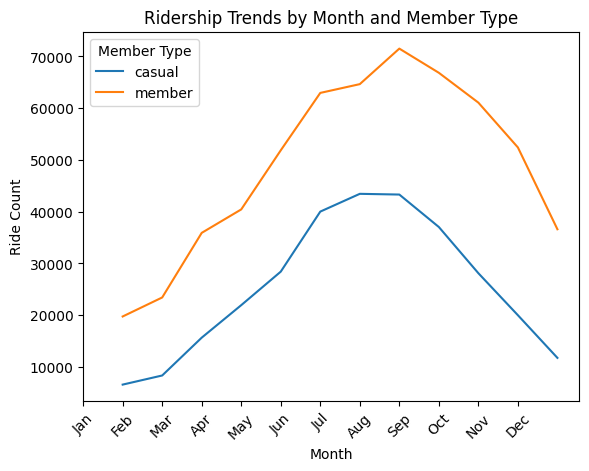

In [16]:
bikes_data['month'] = bikes_data['started_at'].dt.month
bikes_data_lineplot = bikes_data.groupby(['month', 'member_casual']).size().reset_index(name='ride_count')

month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
sns.lineplot(x = 'month', y = 'ride_count', hue = 'member_casual', data = bikes_data_lineplot)

plt.title('Ridership Trends by Month and Member Type')
plt.xlabel('Month')
plt.ylabel('Ride Count')
plt.xticks(range(12), month_labels, rotation = 45)  # Set custom x-axis labels
plt.legend(title='Member Type')

plt.show()

From the above plot we can observe that people tend to use the bikes more during the summer and the fall season of the year. The trend is same across the member as well as causal users.

###### 2) How often do people use bikes by the day of a week? 
Lets check how the trends are across a week

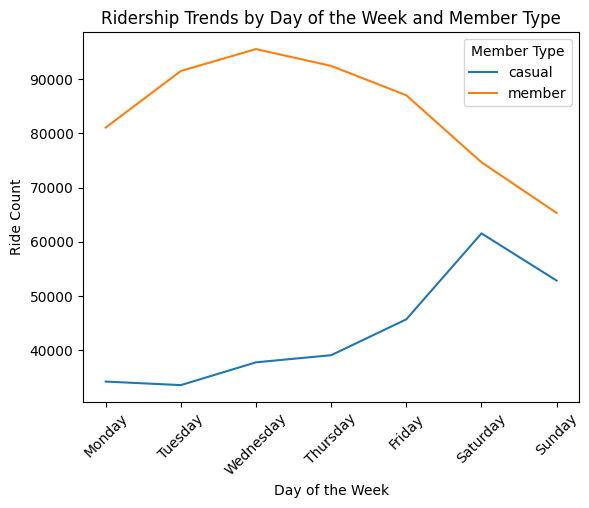

In [17]:
bikes_data['day_of_week'] = bikes_data['started_at'].dt.dayofweek
bikes_data_lineplot = bikes_data.groupby(['day_of_week', 'member_casual']).size().reset_index(name='ride_count')

day_of_week_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.lineplot(x = 'day_of_week', y = 'ride_count', hue='member_casual', data = bikes_data_lineplot)

plt.title('Ridership Trends by Day of the Week and Member Type')
plt.xlabel('Day of the Week')
plt.ylabel('Ride Count')
plt.xticks(range(7), day_of_week_labels, rotation = 45)  # Set custom x-axis labels
plt.legend(title='Member Type')
plt.show()

From the above plot, it is clear that the members utilise the cycles more during the weekdays for their daily commute, whereas the casual riders use CitiBikes during the weekends for their leasure commute.

Lets check how long a trip can go on and catagorize into multiple blocks so that we can identify the short and long duration riders.

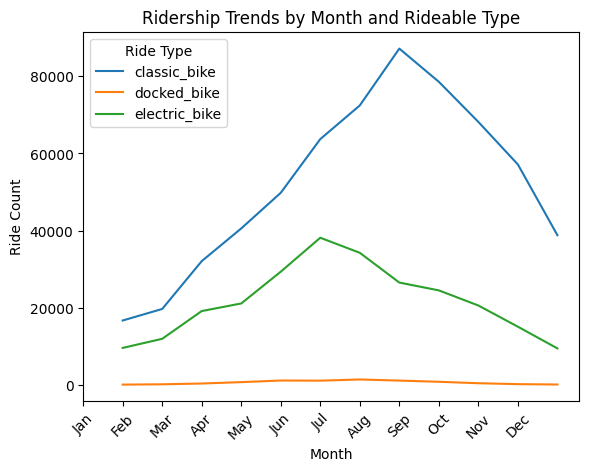

In [ ]:
bikes_data['month'] = bikes_data['started_at'].dt.month
bikes_data_lineplot = bikes_data.groupby(['month', 'rideable_type']).size().reset_index(name='ride_count')

month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
sns.lineplot(x = 'month', y = 'ride_count', hue = 'rideable_type', data = bikes_data_lineplot)

plt.title('Ridership Trends by Month and Rideable Type')
plt.xlabel('Month')
plt.ylabel('Ride Count')
plt.xticks(range(12), month_labels, rotation = 45)  # Set custom x-axis labels
plt.legend(title='Ride Type')

plt.show()

###### 3) How long the users ride durations are (in percentage) ? 

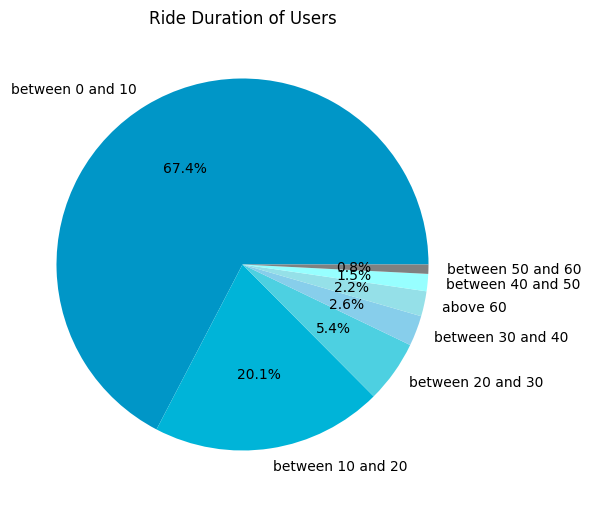

In [18]:
def categorize_ride_duration(duration):
    if duration >= 0 and duration <= 10:
        return 'between 0 and 10'
    elif duration > 10 and duration <= 20:
        return 'between 10 and 20'
    elif duration > 20 and duration <= 30:
        return 'between 20 and 30'
    elif duration > 30 and duration <= 40:
        return 'between 30 and 40'
    elif duration > 40 and duration <= 50:
        return 'between 40 and 50'
    elif duration > 50 and duration <= 60:
        return 'between 50 and 60'
    elif duration > 60:
        return 'above 60'
    else:
        return 'other values'


bikes_data['ride_duration_categorical'] = (bikes_data["ride_duration"] / pd.Timedelta(minutes=1)).apply(categorize_ride_duration)
pie_data = bikes_data.ride_duration_categorical.value_counts().rename_axis('Time Range').reset_index(name='Users')[:-1]

plt.figure(figsize=(6, 8))
colors = ['#0096C7', '#00B4D8', '#4DD0E1', 'skyblue', '#95E0E8', '#97FFFF', 'gray']
plt.pie(pie_data['Users'], labels = pie_data['Time Range'], autopct='%1.1f%%',  colors=colors)
plt.title('Ride Duration of Users')
plt.show()

From the above plot, it is clear that more than 85% of the people use the CityBikes for shorter rides (0-20 mins), about 5% of the people use for half an hour and less than 10% of the riders go above 40 minutes. This indicates that the bikes are frequently used for short distance travels.

Next we will analyse what are the most used Start and End stations and which are the most frequently used ride paths across the year. This helps us to understand the riding patterns across multiple locations.

###### 4) Let's visualize some of the popular stations showing the connections between them based on the frequency of rides.

In [20]:
sample_size = 20000
sampled_bikes_data = bikes_data.sample(n=sample_size, random_state=123)

count_of_routes = sampled_bikes_data.groupby(['start_station_name', 'end_station_name']).size().reset_index(name='count')
sorted_routes_count = count_of_routes.sort_values('count', ascending=False)

map_obj = folium.Map(location =[40.7142700, -74.0059700], zoom_start=12)
top_50_stations = sampled_bikes_data['start_station_name'].value_counts().index[:10]

for station in top_50_stations:
    location = sampled_bikes_data[sampled_bikes_data['start_station_name'] == station].iloc[0]
    folium.Marker(location =[location['start_lat'], location['start_lng']], popup =station).add_to(map_obj)

for index, row in sorted_routes_count.iterrows():
    start_station = sampled_bikes_data[sampled_bikes_data['start_station_name'] == row['start_station_name']].iloc[0]
    end_station = sampled_bikes_data[sampled_bikes_data['end_station_name'] == row['end_station_name']].iloc[0]
    folium.PolyLine(locations =[[start_station['start_lat'], start_station['start_lng']], [end_station['end_lat'], end_station['end_lng']]], color='red', weight=row['count']/40).add_to(map_obj)

map_obj.save('route_map.html')
map_obj

In the above map, the red lines indicate the path used by riders for their trip. The intensity of the red color increases as the frequency of the usage increases. This might indicate specific locations in the city where the frequent commutes happen i.e., towards work or school or any regular activity. The color intensity also indicates the buisiest places in the city.



The below are the top 10 most frequently used routes by the commuters.

In [25]:
top_10_routes = sorted_routes_count.head(10).sort_values('count', ascending=False)
top_10_routes

,start_station_name,end_station_name,count
1879,Hoboken Terminal - Hudson St & Hudson Pl,Hoboken Ave at Monmouth St,137
3227,South Waterfront Walkway - Sinatra Dr & 1 St,South Waterfront Walkway - Sinatra Dr & 1 St,134
2534,Marin Light Rail,Grove St PATH,110
1821,Hoboken Ave at Monmouth St,Hoboken Terminal - Hudson St & Hudson Pl,90
3173,South Waterfront Walkway - Sinatra Dr & 1 St,12 St & Sinatra Dr N,86
1549,Grove St PATH,Marin Light Rail,85
2310,Liberty Light Rail,Liberty Light Rail,84
81,12 St & Sinatra Dr N,South Waterfront Walkway - Sinatra Dr & 1 St,79
125,14 St Ferry - 14 St & Shipyard Ln,South Waterfront Walkway - Sinatra Dr & 1 St,71
2952,Newport Pkwy,Newport Pkwy,70


###### 5) What are the top 10 start stations most commonly used, individually ?

In [27]:
#Start Locations - Most Commonly Used 


station_name_counts = bikes_data['start_station_name'].value_counts().reset_index()
station_name_counts.columns = ['start_station_name', 'count']

unique_start_stations = bikes_data.drop_duplicates(subset=['start_station_name'])

station_counts_lat_long = unique_start_stations.merge(station_name_counts, on='start_station_name')

station_counts_lat_long = station_counts_lat_long[['start_station_name', 'count', 'start_lat', 'start_lng']]

station_counts_lat_long.reset_index(drop=True, inplace=True)

start_top_10_results = station_counts_lat_long.head(10)

fig = px.scatter_mapbox(start_top_10_results,lat='start_lat',lon='start_lng',hover_name = 'start_station_name',size='count',zoom=12,mapbox_style='open-street-map')       
fig.show()



In [28]:
start_top_10_results.sort_values(by = ["count"], ascending= False)

,start_station_name,count,start_lat,start_lng
8,City Hall - Washington St & 1 St,23214,40.737360,-74.030970
1,Columbus Dr at Exchange Pl,16676,40.716870,-74.032810
5,Columbus Park - Clinton St & 9 St,11819,40.748161,-74.032453
2,Clinton St & Newark St,11393,40.737430,-74.035710
7,Adams St & 2 St,9241,40.739814,-74.036904
3,Brunswick & 6th,8889,40.726012,-74.050389
0,Marshall St & 2 St,8364,40.740802,-74.042521
9,Riverview Park,6397,40.744319,-74.043991
4,Christ Hospital,5190,40.734786,-74.050444
6,Lincoln Park,4330,40.724605,-74.078406


###### 6) What are the top 10 end stations most commonly used, individually ?

In [29]:
station_name_counts = bikes_data['end_station_name'].value_counts().reset_index()
station_name_counts.columns = ['end_station_name', 'count']

unique_start_stations = bikes_data.drop_duplicates(subset=['end_station_name'])

station_counts_lat_long = unique_start_stations.merge(station_name_counts, on='end_station_name')

station_counts_lat_long = station_counts_lat_long[['end_station_name', 'count', 'end_lat', 'end_lng']]

station_counts_lat_long.reset_index(drop=True, inplace=True)

end_top_10_results = station_counts_lat_long.head(10)

fig = px.scatter_mapbox(end_top_10_results,lat='end_lat',lon='end_lng',size='count',hover_name = 'end_station_name',zoom=12,mapbox_style='open-street-map')       
fig.show()

In [30]:
end_top_10_results.sort_values(by = ["count"], ascending= False)

,end_station_name,count,end_lat,end_lng
5,Grove St PATH,44730,40.719586,-74.043117
8,Hoboken Terminal - River St & Hudson Pl,32417,40.736068,-74.029127
1,11 St & Washington St,15471,40.749985,-74.027150
0,8 St & Washington St,13882,40.745984,-74.028199
4,Clinton St & 7 St,11439,40.745420,-74.033320
9,Grand St,10830,40.715178,-74.037683
7,9 St HBLR - Jackson St & 8 St,10665,40.747907,-74.038412
3,Bloomfield St & 15 St,9891,40.754530,-74.026580
6,Hilltop,5731,40.731169,-74.057574
2,Oakland Ave,5058,40.737604,-74.052478


##### **Conclusion & Bias**



Based on the analysis of the Citi Bike data, the following concrete conclusions can be drawn:
* The majority of Citi Bike users in 2022 were `member` users, indicating a high demand for long-term subscription among tourists and occasional riders. But we have also observed that `casual` users tend to use the bikes during the weekends. Having a weekend membership plan might push the casual users to subscribe for a budget friendly membership option.
* Still most of the riders prefer `Classic Bikes` for their daily commute. Improving the fleet of `Electric Bikes` available across the city along with a special price for using them might push the Classic riders towards the electric option.
* The start and end station names and IDs provide valuable information for understanding rider preferences and station utilization patterns

Based on the information collected we obtained the most popular stations and pathways used by the commuters. From the application we observed that the top 3 most used stations are not yet upscaled to the current needs.

<img src="ff.jpg" width="" align="" />

The above analysis is done using the data collected throught the year of 2022. It doesn't include a lot of other information like number of docks available at each station, gender of the users and also the weather conditions on a particular day which leads towards a generalised conclusion. This can be solved by considering additional sources like APIs or Webhooks.

In [32]:
!jupyter nbconvert --execute --to html '/work/FinalProject.ipynb'

[NbConvertApp] Converting notebook /work/FinalProject.ipynb to html
[NbConvertApp] ERROR | Notebook JSON is invalid: Additional properties are not allowed ('block_group' was unexpected)

Failed validating 'additionalProperties' in markdown_cell:

On instance['cells'][0]:
{'block_group': '748516550b1a4eea9b3604630f345b24',
 'cell_type': 'markdown',
 'metadata': {'cell_id': '38e5ce07a9284b59b9e8059ba6425f91',
              'deepnote_app_coordinates': {'h': 5, 'w': 12, 'x': 0, 'y': 0},
              'deepnote_cell_type': 'markdown'},
 'source': '### <center>**CitiBike Data Analysis**</center>'}
[NbConvertApp] Writing 3609932 bytes to /work/FinalProject.html


##### Citations:
* https://s3.amazonaws.com/tripdata/index.html
* https://citibikenyc.com/homepage

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b3ba52ea-63b3-4a97-8b86-8764f764f060' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>